In [1]:
import tensorflow as tf

In [3]:
dataset = tf.data.Dataset.range(10)

In [4]:
dataset

<RangeDataset shapes: (), types: tf.int64>

In [5]:
dataset = dataset.window(size=5, shift=1, drop_remainder=True)

In [6]:
dataset

<WindowDataset shapes: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([])), types: DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))>

In [7]:
dataset = dataset.flat_map(lambda window: window.batch(5))

In [8]:
dataset

<FlatMapDataset shapes: (None,), types: tf.int64>

In [9]:
for window in dataset:
    print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [11]:
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

In [14]:
dataset

<MapDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [15]:
dataset.shuffle(buffer_size=10)

<ShuffleDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [17]:
for x, y in dataset:
    print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [18]:
dataset = dataset.batch(2).prefetch(1)

In [19]:
for x, y in dataset:
    print(x.numpy(), y.numpy())

[[0 1 2 3]
 [1 2 3 4]] [[4]
 [5]]
[[2 3 4 5]
 [3 4 5 6]] [[6]
 [7]]
[[4 5 6 7]
 [5 6 7 8]] [[8]
 [9]]



# Lesson 2

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [22]:
def plot_series(time , series, format="-", start =0 , end = None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, 
                   np.cos(season_time * 2 * np.pi), 
                   1/np.exp(3 * season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
    season_time= ((time +  phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise( time, noise_level = 1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level



In [24]:
time = np.arange(4*365 + 1, dtype = "float32")
time.shape

(1461,)

In [28]:
import pandas as pd

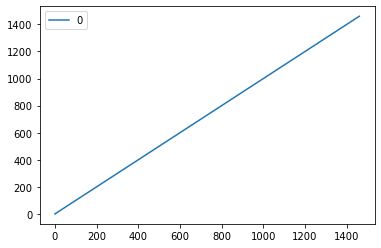

In [29]:
time1 = pd.DataFrame(time)
time1.plot()

In [30]:
baseline = 10
series = trend(time=time, slope=0.1)
amplitude = 40
slope = 0.05
noise_level = 5

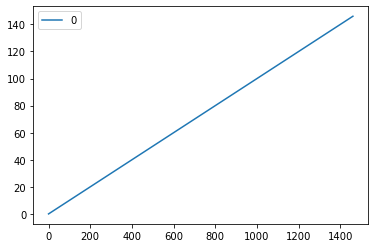

In [32]:
series1 = pd.DataFrame(trend(time=time, slope=0.1))
series1.plot()

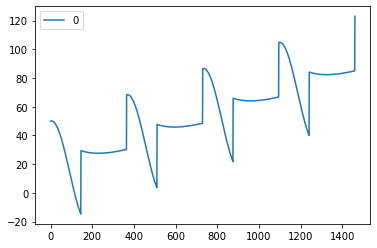

In [33]:
#Create the series
series = baseline + trend(time=time, slope=slope) + seasonality(time=time, period=365, amplitude=amplitude)
series1 = pd.DataFrame(series)
series1.plot()

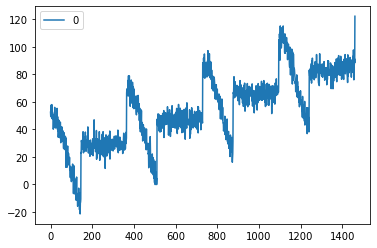

In [34]:
series = series + noise(time = time, noise_level=noise_level, seed=42)
series1 = pd.DataFrame(series)
series1.plot()

In [35]:
series1

,0
0,52.483571
1,49.352750
2,53.314737
3,57.711821
4,48.934446
...,...
1456,88.624756
1457,86.796989
1458,91.373256
1459,88.323831
